# Overview

This notebook goes more into the details of the function *compute_performance*, to better understand how is used and to have more intuitive graphic representations.

#### 1. Import the necessary libraries and functions.

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

from mentevo import Experiment
from mentevo import compute_performance, plot_curves

#### 2. Define and simulate the Dynamical System using the class *Expriment*.

In this example case we have a heterogeneous group of 2 agents in a 2-task switching environmet.

In [2]:
experiment = Experiment(number_of_agents=2,
                        number_of_tasks=2,
                        communication_graph=None,
                        task_graph=None,
                        g=np.array([3.0, 5.0]),
                        initial_state=None,
                        total_time=800,
                        number_of_switches=3,
                        number_of_informed=None)

simulation_results = experiment.solve()
simulation_results.shape

(4, 800)

#### 3. Plot the simulation results using *plot_curves*.

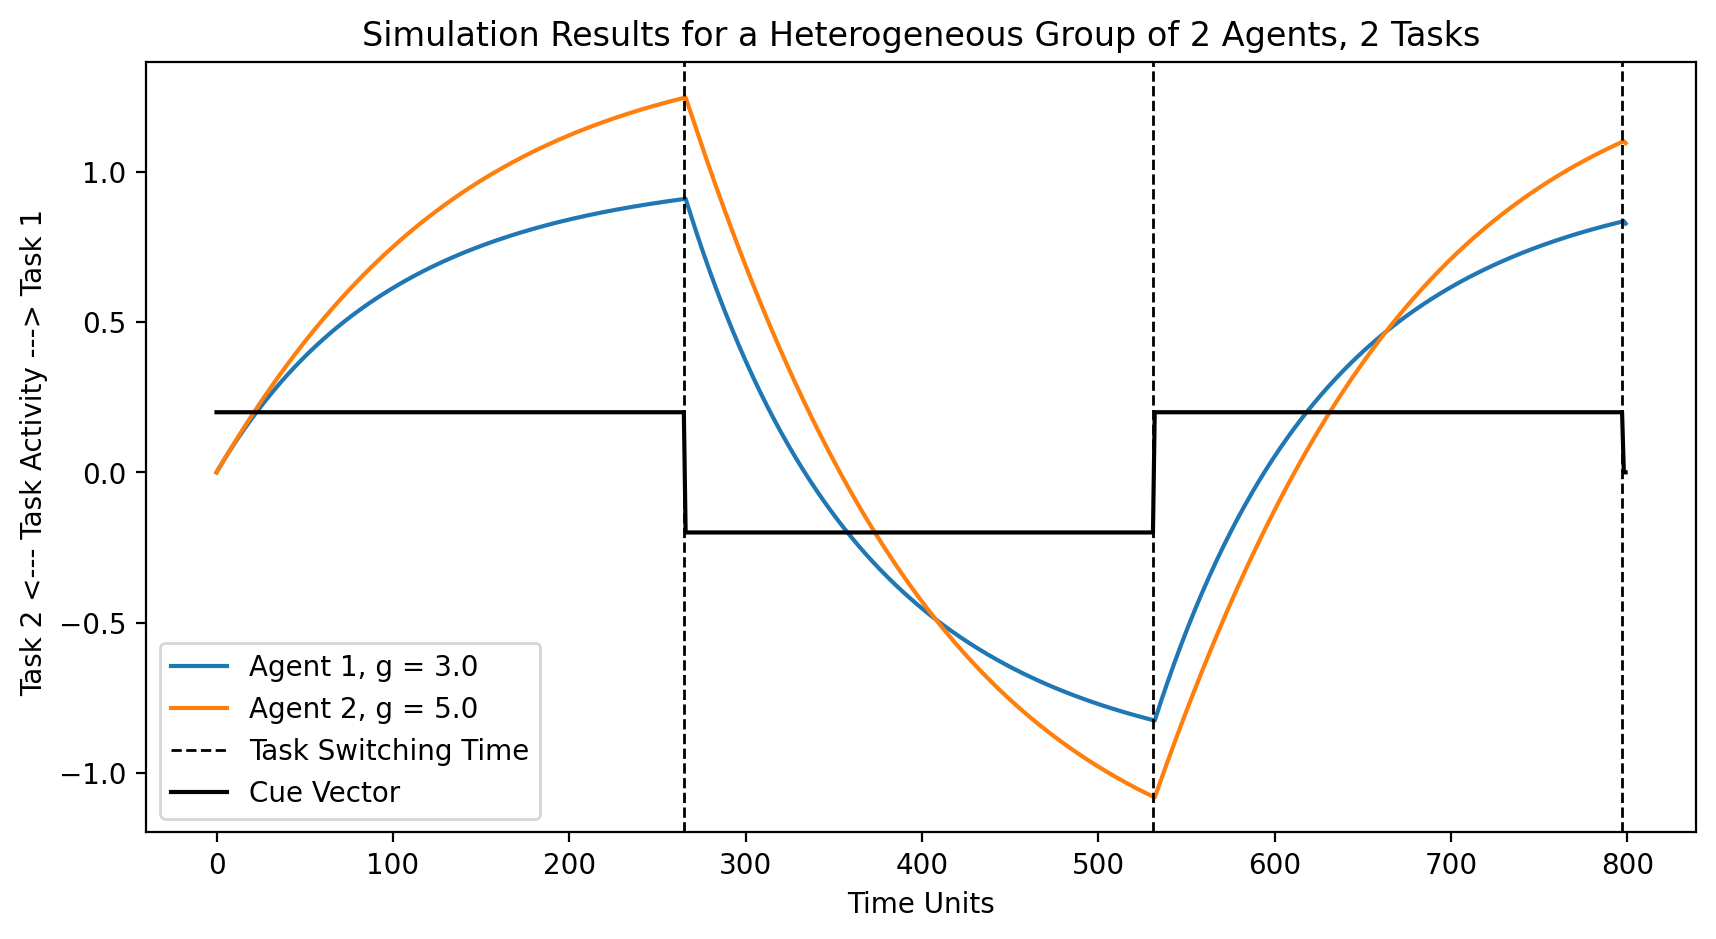

In [4]:
# Function to define the dimension of the figures
def set_size(w, h):
  plt.figure(figsize=(w, h))

set_size(10, 5)
plot_curves(experiment, simulation_results, title='Simulation Results for a Heterogeneous Group of 2 Agents, 2 Tasks', 
            y_label='Task 2 <--- Task Activity ---> Task 1 ', x_label='Time Units', show_legend=True, show_cue_vector=True,
            legend_labels=['Agent 1, g = 3.0', 'Agent 2, g = 5.0'])

Note: for simplicity, we chose to plot the difference between activity on Task 1 and activity on Task 2 and normalized over 2. In this way, a positive value of the task activity means that the agent is more focused on the first task and a negative values means that it's more focused on the seocond task.

#### 5. Compute the performances of the agents and the group performance using *compute_performance*.

In [5]:
individual_performance, group_performance, detailed_scores, individual_performance_t = compute_performance(experiment, simulation_results, detailed=True)

j = 0
for g in experiment.g:
    for i in range(experiment.number_of_tasks):
        print(f'gain value = {g}, individual performance on Task {i+1}= {individual_performance_t[j]}')
        j = j + 1
    j = 2

for g, s in zip(experiment.g, individual_performance):
    print(f'gain value = {g}, individual performance = {s}')

print('group performance = ', group_performance)

gain value = 3.0, individual performance on Task 1= 332.92350345260496
gain value = 3.0, individual performance on Task 2= 332.92350345260496
gain value = 5.0, individual performance on Task 1= 366.8272267477506
gain value = 5.0, individual performance on Task 2= 366.8272267477506
gain value = 3.0, individual performance = 665.8470069052099
gain value = 5.0, individual performance = 733.6544534955012
group performance =  1399.501460400711


Note: the performances on the 2 tasks are the same since the system is deterministic and completely symmetric (as you can see below).

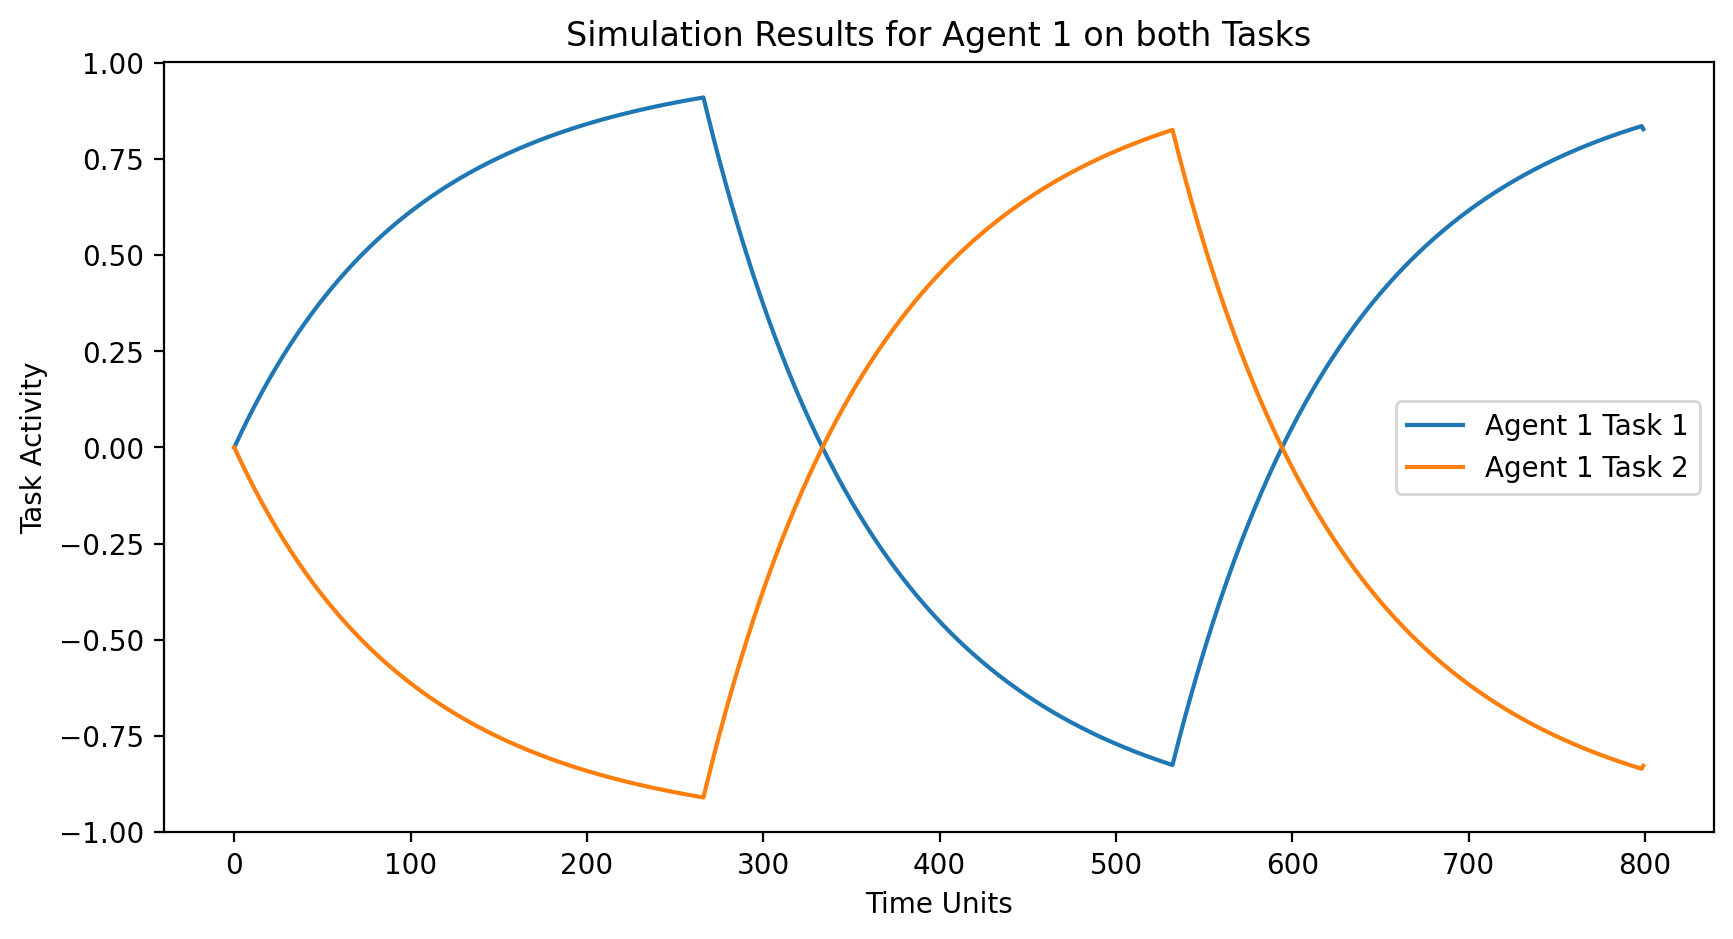

In [6]:
set_size(10, 5)
plt.plot(simulation_results[0], label='Agent 1 Task 1')
plt.plot(simulation_results[1], label='Agent 1 Task 2')
plt.title("Simulation Results for Agent 1 on both Tasks")
plt.xlabel("Time Units")
plt.ylabel("Task Activity")

plt.legend()
plt.show()

Note: here, the fist task is positively activated between 0 and the first task switch, and between the second task swtich and 800, while it's negatively activated between the first and second task switch. The opposite is true for the second task. 
This is because in this experiment the two tasks are mutually inhibitory, meaning that the activation of one task automatically inhibits the other.


Indeed for computing the performance we count the score (=integrated area under the curve) as a reward every time that the right task is activated and the wrong one is inhibited, and we count the score as a penalty every time that the right task is not yet activated and the wrong one is not yet inhibited. To better understand how it works, here below some plots.

#### 6. Visualize the performance metric.

###### First Agent, Task 1:

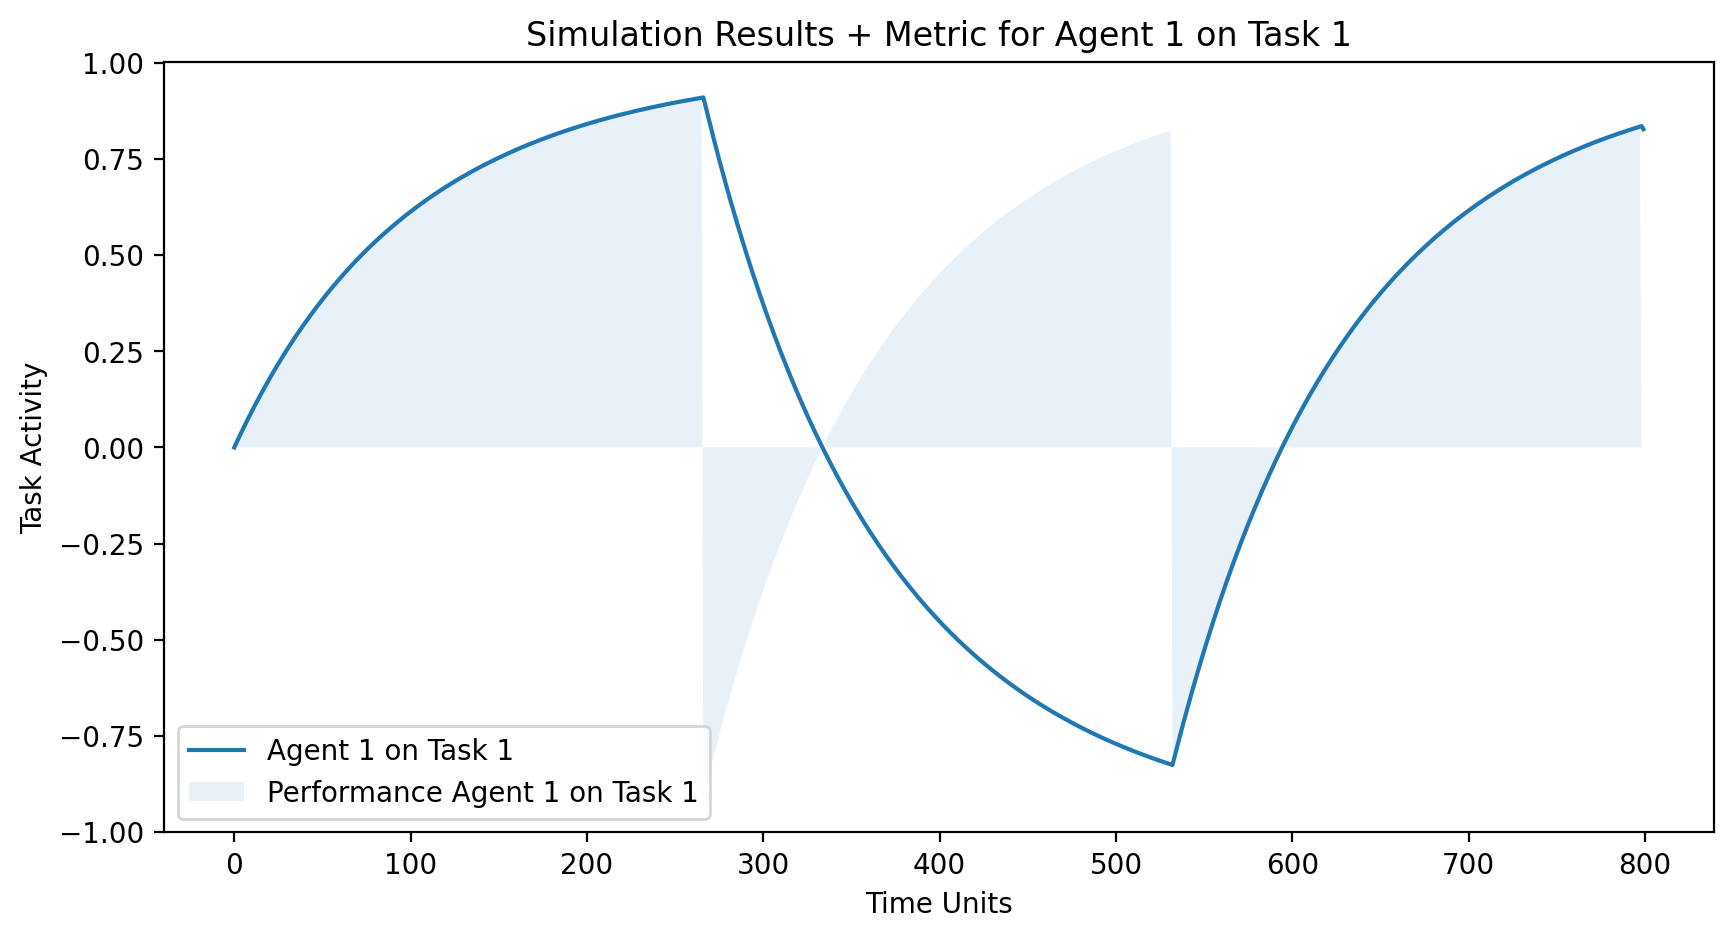

In [8]:
set_size(10, 5)
plt.plot(simulation_results[0], label='Agent 1 on Task 1')
plt.fill_between(range(800), np.zeros(800), detailed_scores[0, :], alpha=0.1, label='Performance Agent 1 on Task 1')
plt.title("Simulation Results + Metric for Agent 1 on Task 1")
plt.xlabel("Time Units")
plt.ylabel("Task Activity")

plt.legend()
plt.show()

###### First Agent, Task 2:

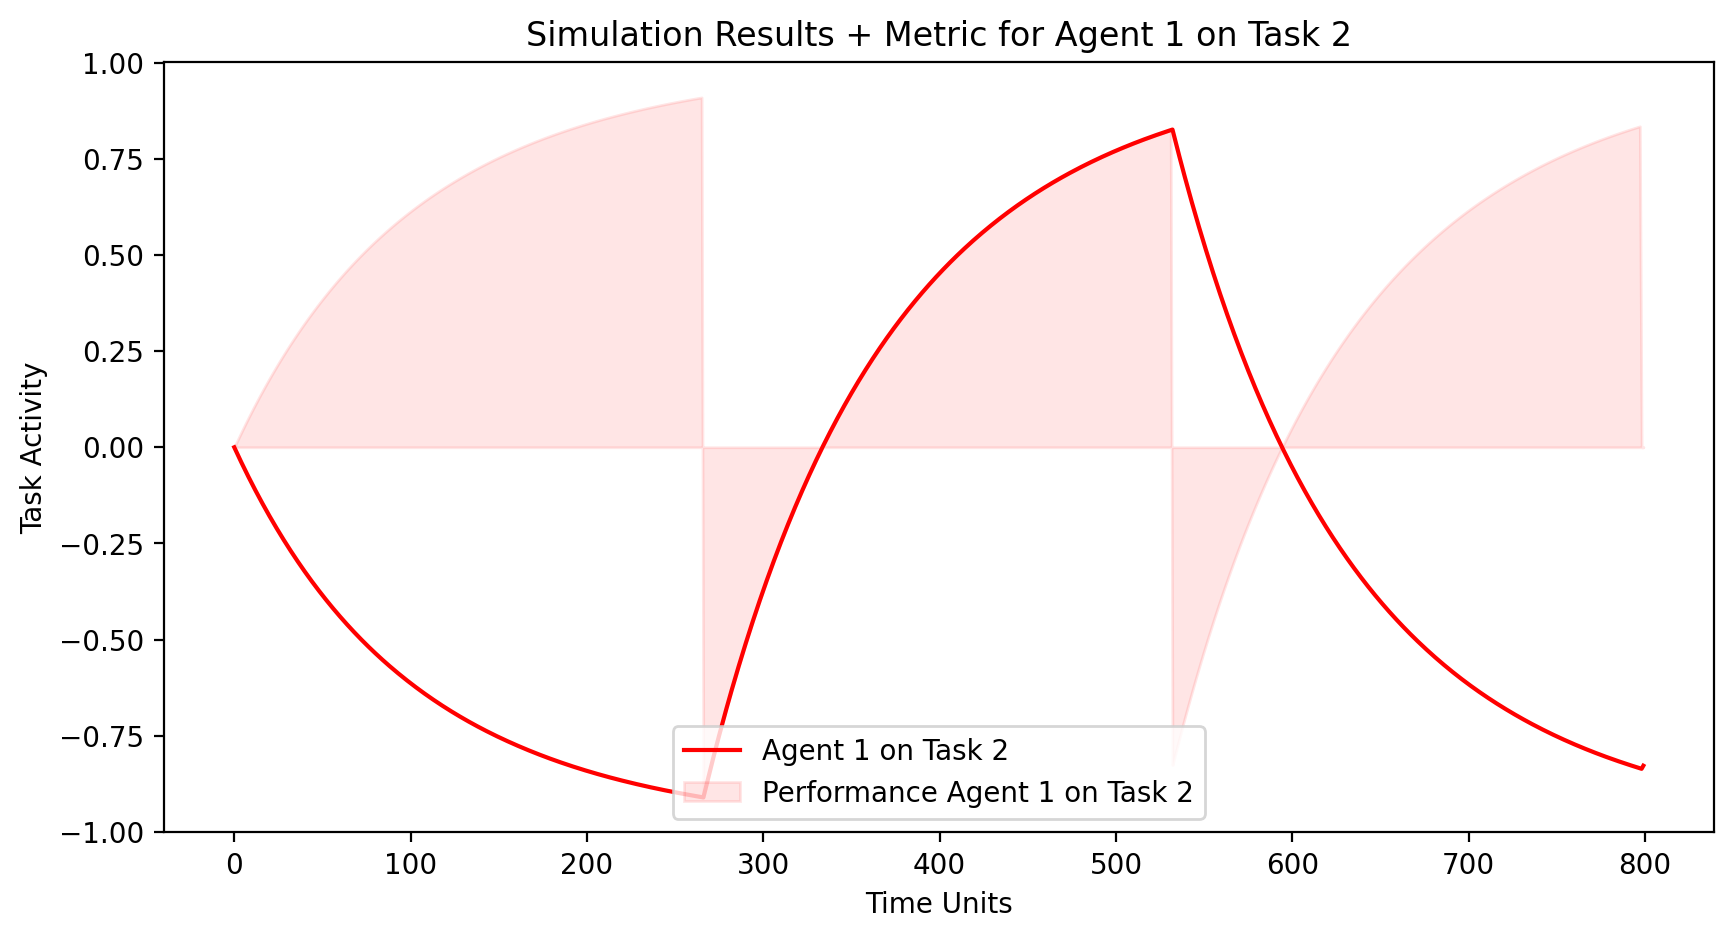

In [9]:
set_size(10, 5)
plt.plot(simulation_results[1], color = 'r', label='Agent 1 on Task 2')
plt.fill_between(range(800), np.zeros(800), detailed_scores[1, :], alpha=0.1, color = 'r',label='Performance Agent 1 on Task 2')
plt.title("Simulation Results + Metric for Agent 1 on Task 2")
plt.xlabel("Time Units")
plt.ylabel("Task Activity")

plt.legend()
plt.show()

###### First Agent, Normalized Difference between Task 1 and 2:

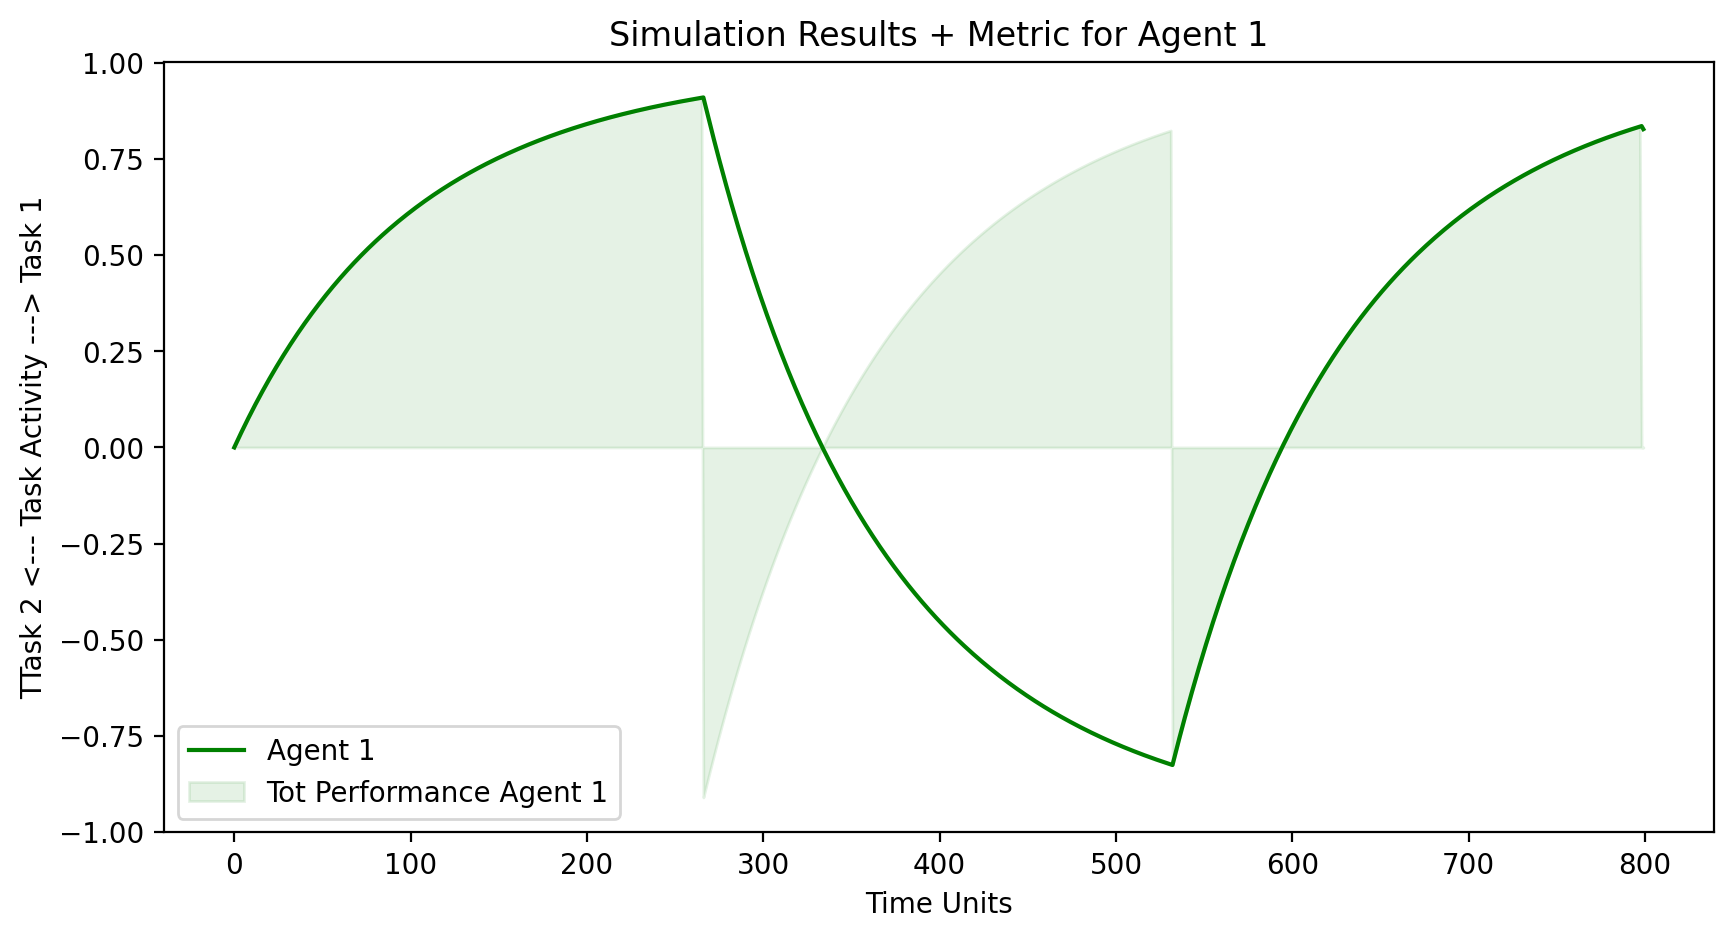

In [10]:
set_size(10, 5)
plt.plot( (simulation_results[0] - simulation_results[1])/2, color = 'g', label='Agent 1')
plt.fill_between(range(800), np.zeros(800), (detailed_scores[0, :] + detailed_scores[1, :])/2, alpha=0.1, color = 'g',label='Tot Performance Agent 1')
plt.title("Simulation Results + Metric for Agent 1")
plt.xlabel("Time Units")
plt.ylabel("TTask 2 <--- Task Activity ---> Task 1")

plt.legend()
plt.show()

Here, again for better clarity, we use the normalized difference of Task 1 and Task 2. The area is counted as a reward for focusing more on the right task when it has a positive value (green areas over 0) and it is counted as a sort of penalty for focusing on the irrelevant task when it has a negative value (green areas under 0). The presence of this penalty when switching to a new task is due to the task-set inertia.